In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy import stats

In [2]:
control= pd.read_excel("Data_Science_Case_Study.xlsx", sheet_name="Control Group")
control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,2017.01.01,2436.124529,90572.0,75440.0,4150.0,1657.0,1541.0,566.0,383.0
1,Control Campaign,2017.01.02,2621.043006,129612.0,95667.0,6387.0,2265.0,1563.0,1577.0,644.0
2,Control Campaign,2017.01.03,2427.021083,132803.0,121762.0,6887.0,3100.0,2048.0,1381.0,639.0
3,Control Campaign,2017.01.04,2565.414978,120570.0,104011.0,6478.0,2579.0,2083.0,1650.0,649.0
4,Control Campaign,2017.01.05,2648.683326,95822.0,69059.0,4532.0,1823.0,1220.0,940.0,455.0


In [3]:
test=pd.read_excel("Data_Science_Case_Study.xlsx", sheet_name="Test Group")
test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,2017.01.01,2335.586267,160244,121551,8223,2989,2949,1371,913
1,Test Campaign,2017.01.02,2899.490621,100793,68241,4972,2162,1388,1253,510
2,Test Campaign,2017.01.03,3031.740149,89525,83450,3514,1365,1251,995,391
3,Test Campaign,2017.01.04,2794.847648,110122,89985,4411,1533,1134,951,434
4,Test Campaign,2017.01.05,2201.845423,122204,84000,5165,1582,1007,810,492


In [4]:
control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        31 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     float64
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(8), object(2)
memory usage: 2.6+ KB


In [5]:
control.isnull().sum().any()

True

In [6]:
control=control.dropna()
control.isnull().sum().any()

False

In [7]:
test.isnull().sum().any()

False

In [8]:
# Let's make a union with Test and Control data for boxplot
controlTest= pd.concat([control, test], ignore_index=True)
controlTest

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,2017.01.01,2436.124529,90572.0,75440.0,4150.0,1657.0,1541.0,566.0,383.0
1,Control Campaign,2017.01.02,2621.043006,129612.0,95667.0,6387.0,2265.0,1563.0,1577.0,644.0
2,Control Campaign,2017.01.03,2427.021083,132803.0,121762.0,6887.0,3100.0,2048.0,1381.0,639.0
3,Control Campaign,2017.01.04,2565.414978,120570.0,104011.0,6478.0,2579.0,2083.0,1650.0,649.0
4,Control Campaign,2017.01.05,2648.683326,95822.0,69059.0,4532.0,1823.0,1220.0,940.0,455.0
5,Control Campaign,2017.01.06,2306.081623,118268.0,83562.0,6596.0,2955.0,1815.0,1455.0,734.0
6,Control Campaign,2017.01.07,2356.996404,144806.0,105315.0,8139.0,3262.0,2559.0,1502.0,799.0
7,Control Campaign,2017.01.08,2670.222971,97719.0,74746.0,5508.0,2282.0,1840.0,837.0,605.0
8,Control Campaign,2017.01.09,2720.901584,113781.0,97334.0,5901.0,2109.0,1955.0,1959.0,562.0
9,Control Campaign,2017.01.10,2441.534142,125097.0,90192.0,7646.0,2914.0,2200.0,1433.0,717.0


In [9]:
controlTest.columns =["campaign","date","spend","impression","reach","website_clicks","search","view_content","add_cart","purchase"]
controlTest

,campaign,date,spend,impression,reach,website_clicks,search,view_content,add_cart,purchase
0,Control Campaign,2017.01.01,2436.124529,90572.0,75440.0,4150.0,1657.0,1541.0,566.0,383.0
1,Control Campaign,2017.01.02,2621.043006,129612.0,95667.0,6387.0,2265.0,1563.0,1577.0,644.0
2,Control Campaign,2017.01.03,2427.021083,132803.0,121762.0,6887.0,3100.0,2048.0,1381.0,639.0
3,Control Campaign,2017.01.04,2565.414978,120570.0,104011.0,6478.0,2579.0,2083.0,1650.0,649.0
4,Control Campaign,2017.01.05,2648.683326,95822.0,69059.0,4532.0,1823.0,1220.0,940.0,455.0
5,Control Campaign,2017.01.06,2306.081623,118268.0,83562.0,6596.0,2955.0,1815.0,1455.0,734.0
6,Control Campaign,2017.01.07,2356.996404,144806.0,105315.0,8139.0,3262.0,2559.0,1502.0,799.0
7,Control Campaign,2017.01.08,2670.222971,97719.0,74746.0,5508.0,2282.0,1840.0,837.0,605.0
8,Control Campaign,2017.01.09,2720.901584,113781.0,97334.0,5901.0,2109.0,1955.0,1959.0,562.0
9,Control Campaign,2017.01.10,2441.534142,125097.0,90192.0,7646.0,2914.0,2200.0,1433.0,717.0


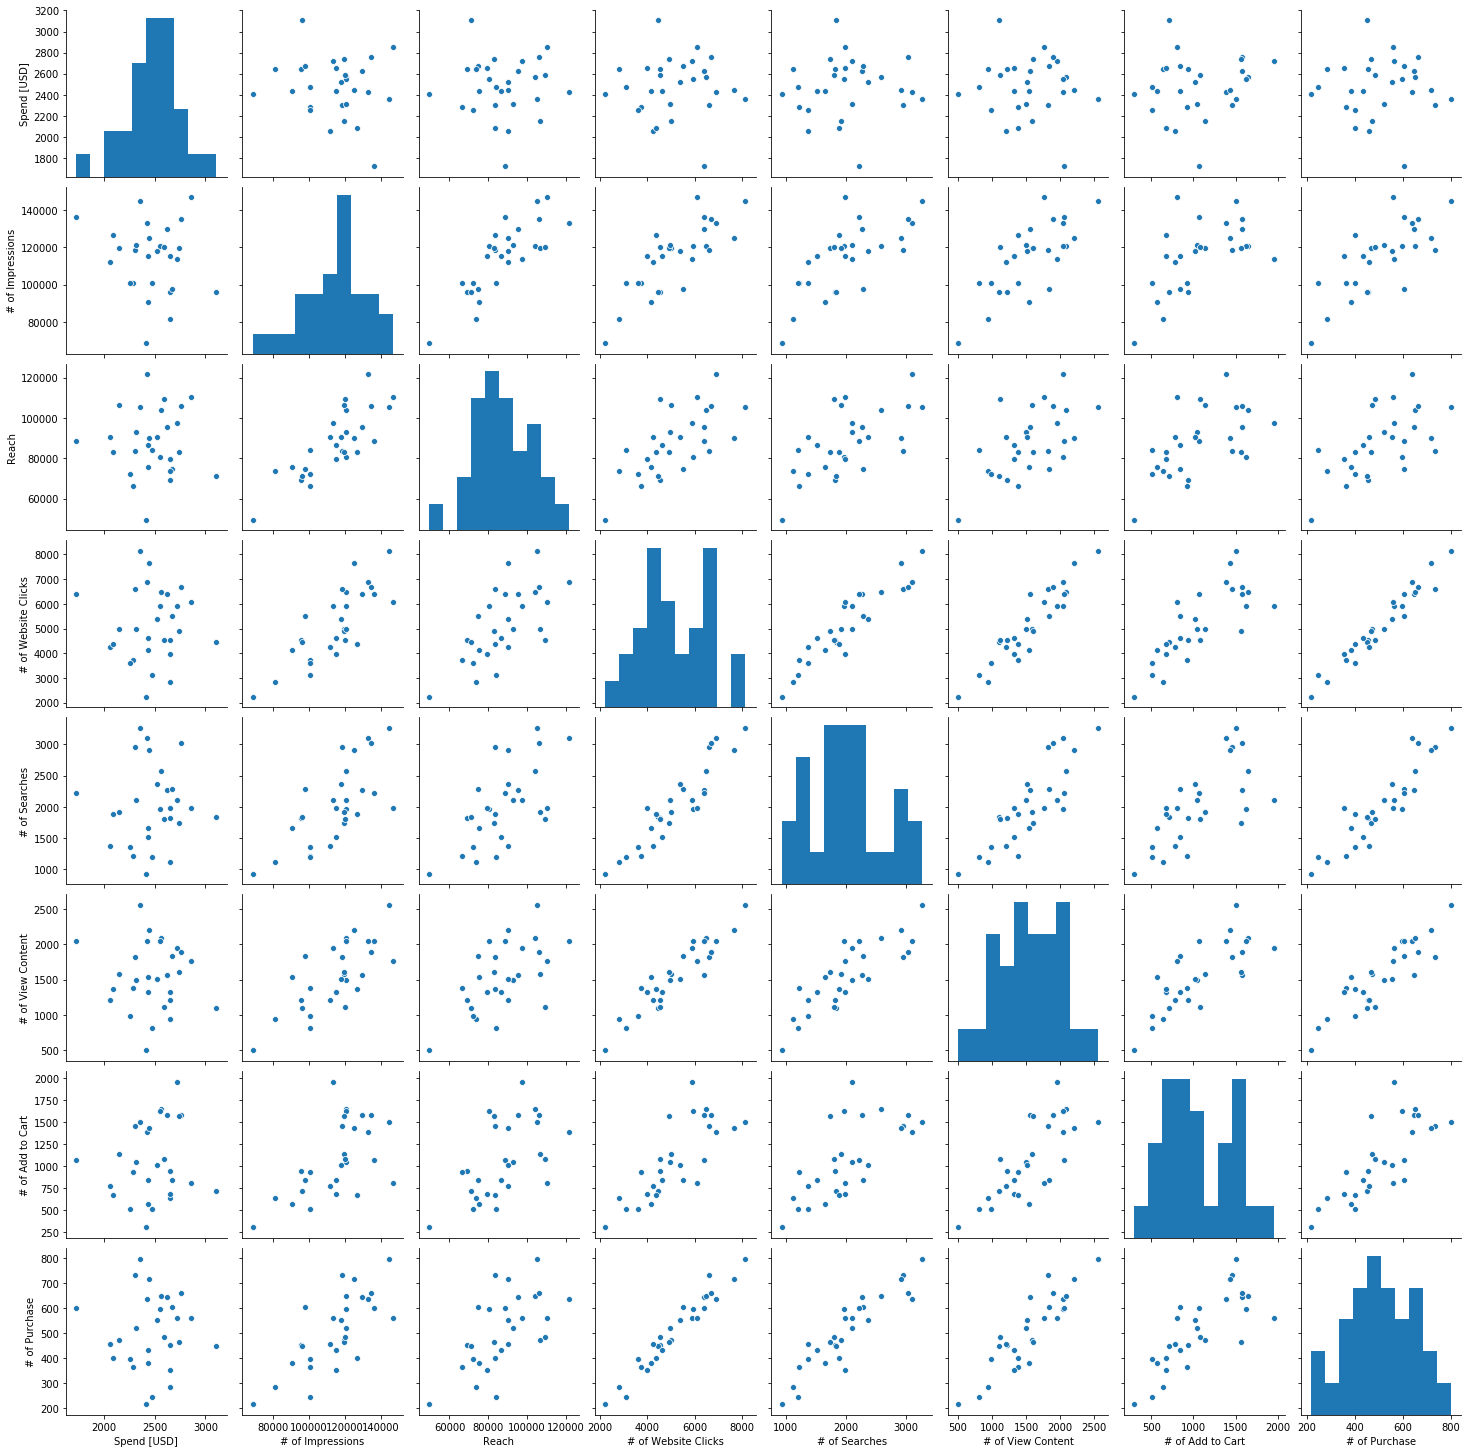

In [10]:
sns.pairplot(control);

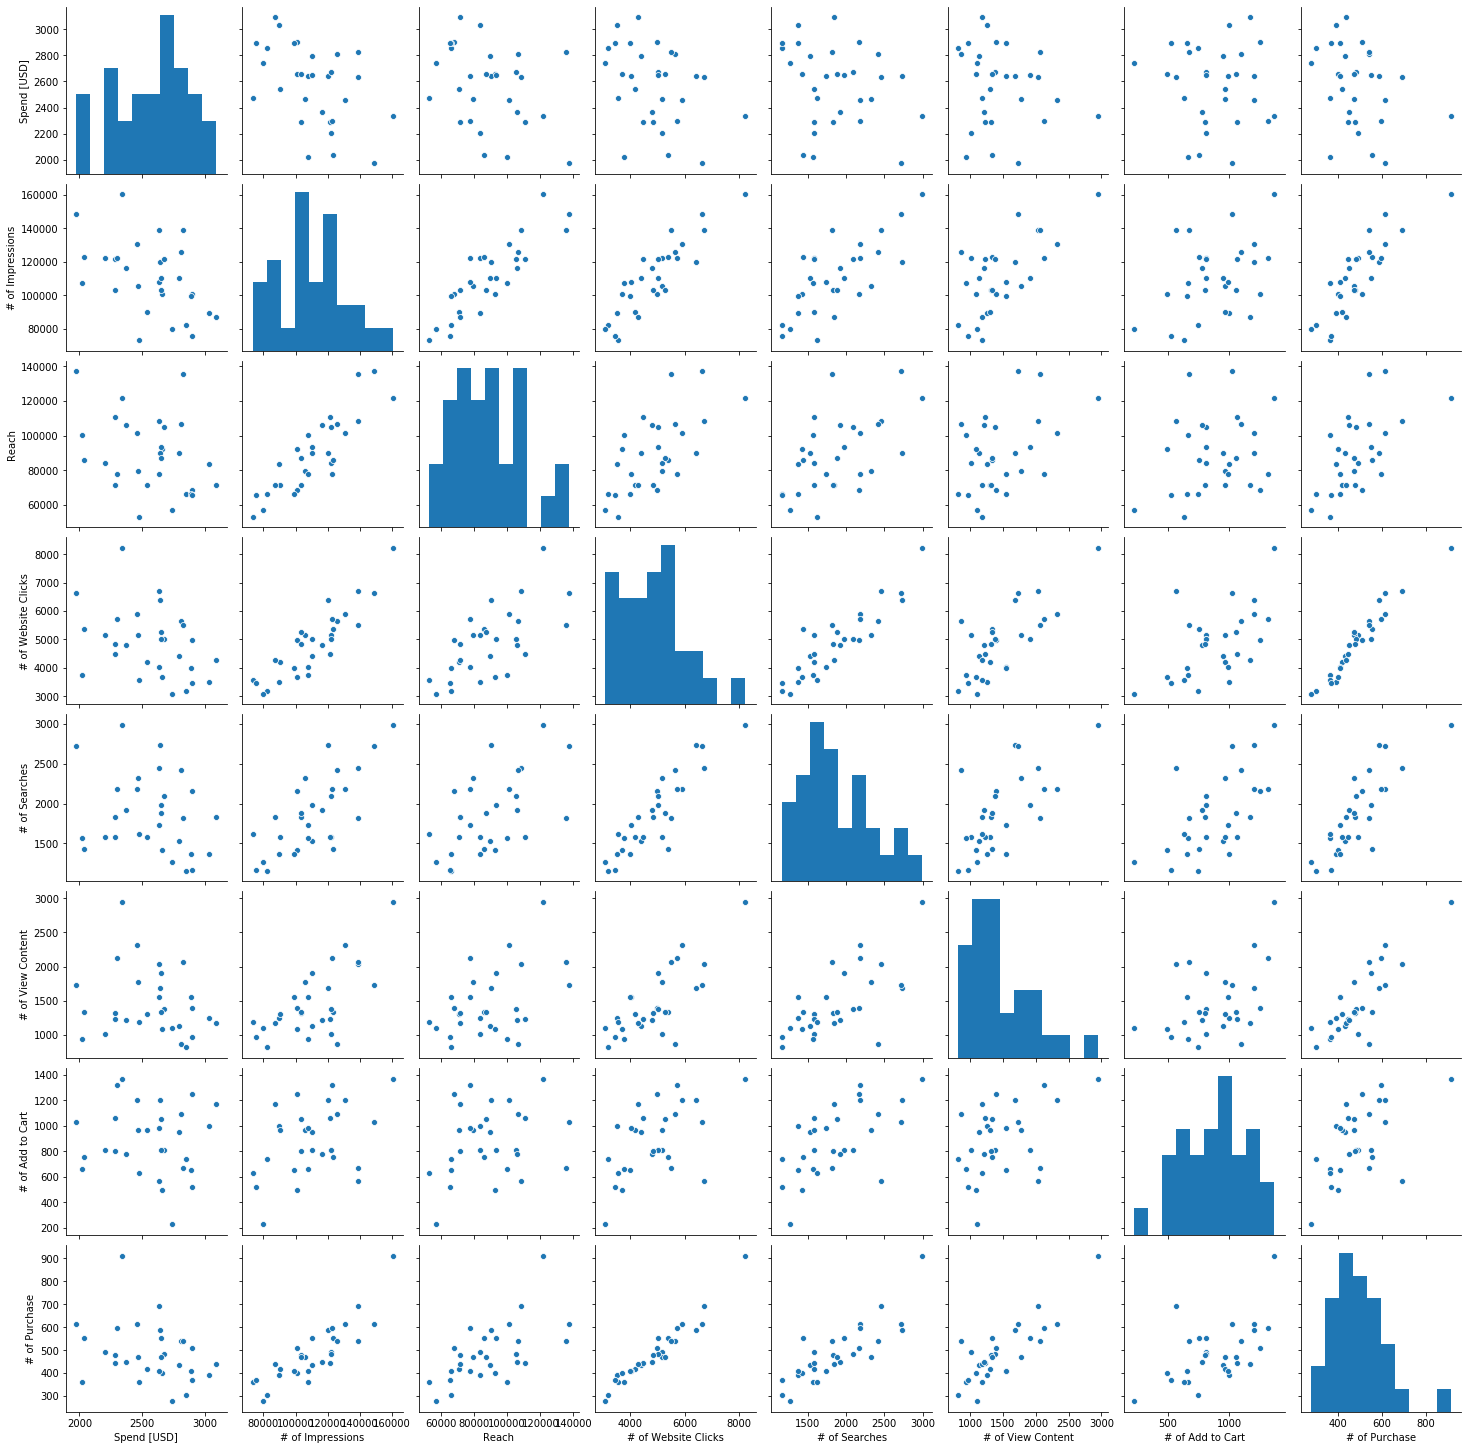

In [11]:
sns.pairplot(test);

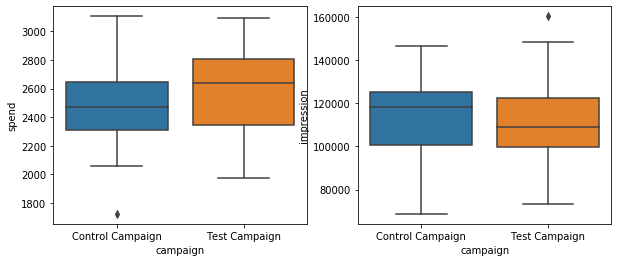

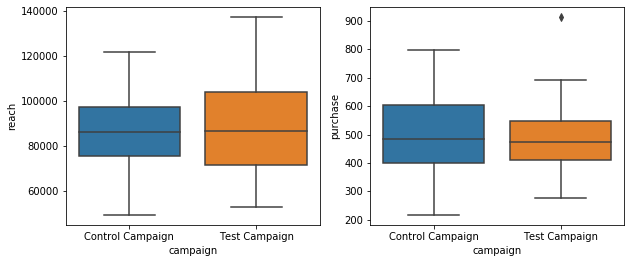

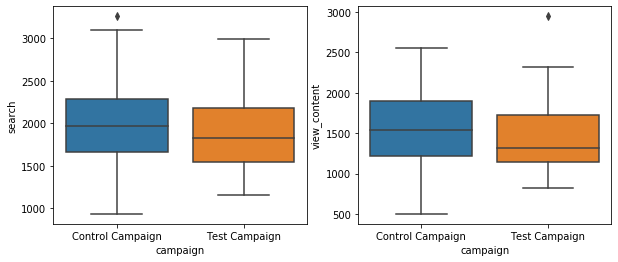

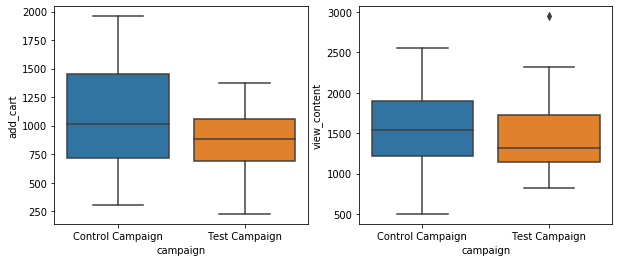

In [12]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
ax = plt.subplot(1, 2, 1)
sns.boxplot(x='campaign', y='spend', data=controlTest)
ax = plt.subplot(1, 2, 2)
sns.boxplot(x='campaign', y='impression', data=controlTest)
plt.show()
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
ax = plt.subplot(1, 2, 1)
sns.boxplot(x='campaign', y='reach', data=controlTest)
ax = plt.subplot(1, 2, 2)
sns.boxplot(x='campaign', y='purchase', data=controlTest)
plt.show()
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
ax = plt.subplot(1, 2, 1)
sns.boxplot(x='campaign', y='search', data=controlTest)
ax = plt.subplot(1, 2, 2)
sns.boxplot(x='campaign', y='view_content', data=controlTest)
plt.show()
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
ax = plt.subplot(1, 2, 1)
sns.boxplot(x='campaign', y='add_cart', data=controlTest)
ax = plt.subplot(1, 2, 2)
sns.boxplot(x='campaign', y='view_content', data=controlTest);

### Normality Test

In [13]:
# change the column names

control.columns =["campaign","date","spend","impression","reach","website_clicks","search","view_content","add_cart","purchase"]
test.columns =   ["campaign","date","spend","impression","reach","website_clicks","search","view_content","add_cart","purchase"]
control=control.drop(["campaign","date"], axis=1)
test=test.drop(["campaign", "date"], axis=1)

In [14]:
control.head().isnull().sum().any()

False

In [23]:
normality_result = {
                    "control":{"rejected":[], "not_rejected":[]},
                    
                    "test":{"rejected":[],"not_rejected":[]}  
                    }


In [24]:
control.head()

,spend,impression,reach,website_clicks,search,view_content,add_cart,purchase
0,2436.124529,90572.0,75440.0,4150.0,1657.0,1541.0,566.0,383.0
1,2621.043006,129612.0,95667.0,6387.0,2265.0,1563.0,1577.0,644.0
2,2427.021083,132803.0,121762.0,6887.0,3100.0,2048.0,1381.0,639.0
3,2565.414978,120570.0,104011.0,6478.0,2579.0,2083.0,1650.0,649.0
4,2648.683326,95822.0,69059.0,4532.0,1823.0,1220.0,940.0,455.0


In [16]:
# Normality Testing for control dataset

for i in control:
    if shapiro(control[i])[1]>0.05:
        print(i,": not rejected")      
    else:
        print(i,"!!! REJECTED !!!")

spend : not rejected
impression : not rejected
reach : not rejected
website_clicks : not rejected
search : not rejected
view_content : not rejected
add_cart : not rejected
purchase : not rejected


In [17]:
# Normality Testing for test dataset

for i in test:
    if shapiro(test[i])[1]>0.05:
        print(i,": not rejected")
    else:
        print(i,"!!! REJECTED !!!")
        

spend : not rejected
impression : not rejected
reach : not rejected
website_clicks : not rejected
search : not rejected
view_content !!! REJECTED !!!
add_cart : not rejected
purchase !!! REJECTED !!!


In [18]:
# Homogenity Testing

for x,y in zip(control,test):
    if stats.levene(control[x], test[y])[1]>0.05:
        print(x,": not rejected")      
    else:
        print(x,"!!! REJECTED !!!")

spend : not rejected
impression : not rejected
reach : not rejected
website_clicks : not rejected
search : not rejected
view_content : not rejected
add_cart !!! REJECTED !!!
purchase : not rejected


In [19]:
# Parametrik Testing

for x,y in zip(control, test):
    test_ist, p_value = stats.ttest_ind(control[x], test[y], equal_var=True)
    print("T test = %.4f, p value = %.4f"% (test_ist,p_value),x,y)

T test = -1.2802, p value = 0.2057 spend spend
T test = 0.7966, p value = 0.4290 impression impression
T test = -0.2434, p value = 0.8086 reach reach
T test = 0.8417, p value = 0.4035 website_clicks website_clicks
T test = 1.0682, p value = 0.2899 search search
T test = 0.7167, p value = 0.4765 view_content view_content
T test = 1.8961, p value = 0.0630 add_cart add_cart
T test = 0.6014, p value = 0.5500 purchase purchase


In [20]:
# NonParametrik Testing

test_ist, p_value = stats.mannwhitneyu(control["view_content"], test["view_content"])
print("T test = %.4f, p value = %.4f"% (test_ist,p_value), "view_content")
test_ist, p_value = stats.mannwhitneyu(control["purchase"], test["purchase"])
print("T test = %.4f, p value = %.4f"% (test_ist,p_value),"purchase")

T test = 360.5000, p value = 0.1309 view_content
T test = 380.0000, p value = 0.2043 purchase


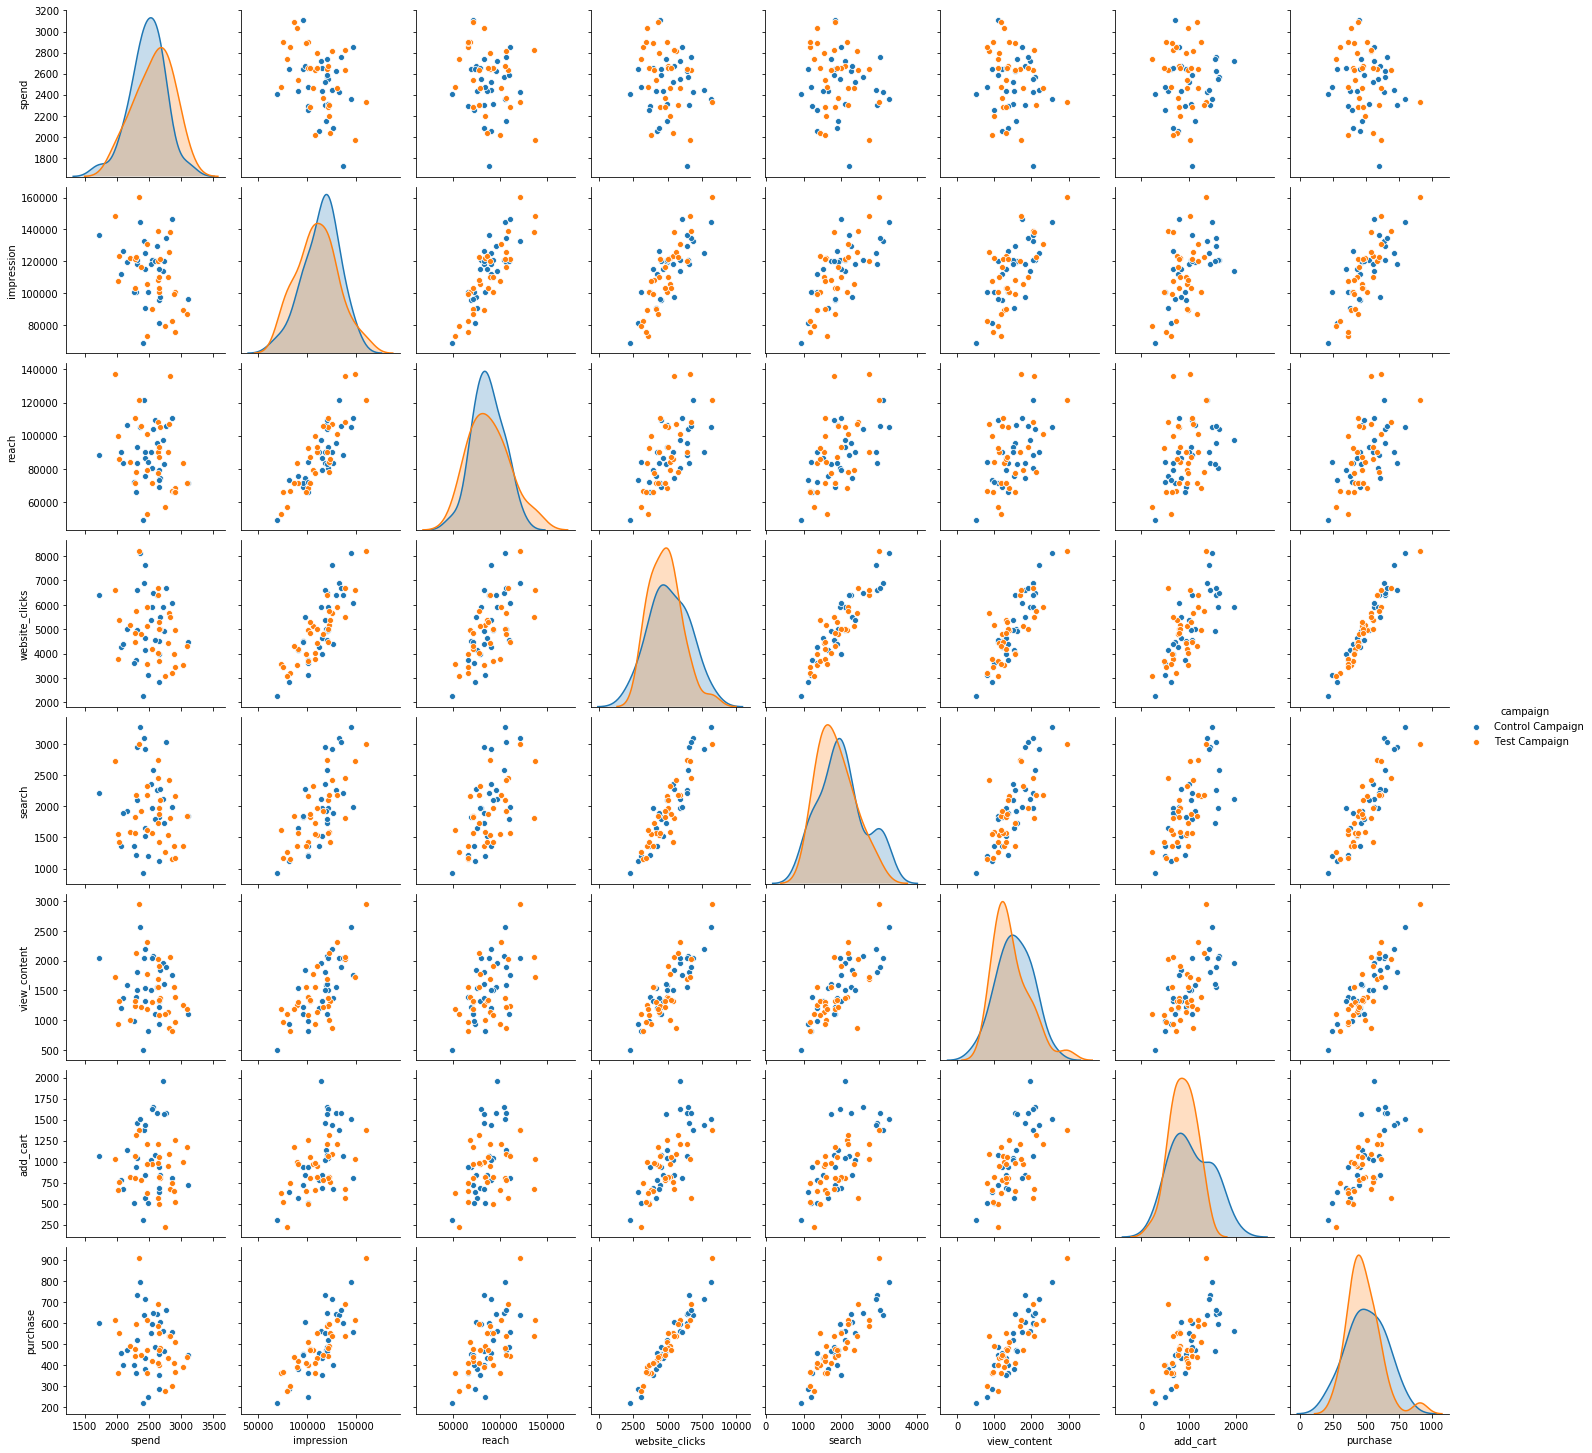

In [22]:
sns.pairplot(controlTest, hue="campaign");